### Criar um modelo preditivo de preço para apartamentos na cidade de Porto Alegre

In [86]:
import numpy as np
import time
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("always")

In [87]:
# leitura da base de dados
df = pd.read_csv('2018-08-06-foxter.csv', sep='\t', decimal=',')

# total of rows
df.shape[0]

19868

In [88]:
df

Unnamed: 0      id       price       area  \
0               0  176703    85000.00      31.39   
1               1  175795   445000.00     100.10   
2               2  176594   414000.00      87.00   
3               3  153614   865000.00     113.57   
4               4  173456  1200000.00     293.00   
5               5  176401   100000.00      18.61   
6               6  164510    95000.00      45.00   
7               7  176202   424000.00     133.98   
8               8  166441   200000.00      51.00   
9               9  167536   155000.00      47.35   
10             10  176334   400000.00      90.00   
11             11  176287   160000.00      26.57   
12             12  176098   200000.00      43.00   
13             13  176197   450000.00     185.00   
14             14  176162   700000.00     201.00   
15             15  163763   185000.00     367.25   
16             16  176108   255000.00      51.00   
17             17  137292   432500.00     450.00   
18             18  176023   290000.00      66.51   
19             19  175987   600000.00     106.00   
20             20  172555   490000.00     258.00   
21             21  175846   380000.00      85.00   
22             22  176637   370000.00     111.11   
23             23  175915   680000.00     159.87   
24             24  175873   450000.00      38.58   
25             25  175822   270000.00      60.00   
26             26  175755  1100000.00     260.00   
27             27  175245  1450000.00     513.00   
28             28  175656   950000.00     108.00   
29             29  175587   450000.00      96.00   
30             30  175574   174900.00      66.00   
31             31  175981  1330000.00     167.76   
32             32  175385   459000.00     120.25   
33             33  175062   120000.00      31.70   
34             34  175445   320000.00     101.74   
35             35  137537   340000.00     115.00   
36             36  161244   170000.00      39.35   
37             37  174216   200000.00      59.37   
38             38  175158   390000.00      87.10   
39             39  175274     8300.00        nan   
40             40  175100   200000.00     360.00   
41             41  175234   780000.00     212.00   
42             42  175202   410000.00      60.61   
43             43  154630   320000.00      57.00   
44             44  175103   360000.00     110.00   
45             45  175155   490000.00      37.08   
46             46  175021   240000.00      45.20   
47             47  176516   180000.00      59.17   
48             48  145115   375000.00      57.00   
49             49  174030   750000.00     151.00   
50             50  174609   230000.00      90.00   
51             51  174609   230000.00      90.00   
52             52  138381   318000.00     107.00   
53             53  174802   350000.00      82.58   
54             54  174910   310000.00     111.50   
55             55  172934   165000.00      51.89   
56             56  174302  1350000.00     209.07   
57             57  174487  2600000.00     288.56   
58             58  143758   413419.00      49.18   
59             59  165543   450000.00      59.53   
60             60  174542   349000.00      68.00   
61             61  173671  1680000.00     200.00   
62             62  174593    51000.00        nan   
63             63  173894   340000.00      83.90   
64             64  167635   237750.00      60.70   
65             65  176608   426000.00      98.70   
66             66  176585   178000.00      48.42   
67             67  153790   449000.00     186.00   
68             68  168789   215000.00      44.00   
69             69  176377   180000.00      50.50   
70             70  176422   475000.00      76.75   
71             71  176368   280000.00      84.84   
72             72  176300   255000.00      41.30   
73             73  176100   430000.00      91.89   
74             74  176218   110000.00      27.00   
75             75  176198    47000.00      12.00   
76 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19868 entries, 0 to 19867
Data columns (total 14 columns):
Unnamed: 0     19868 non-null int64
id             19868 non-null int64
price          19794 non-null float64
area           19817 non-null float64
district       19866 non-null object
city           19868 non-null object
type           19868 non-null object
segment        19198 non-null object
condominium    12795 non-null float64
iptu           14578 non-null float64
rooms          19868 non-null object
box            18750 non-null float64
url            19868 non-null object
date           19868 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 2.1+ MB


In [90]:
# identificar o número da linha relativa ao meu apartamento
_ = df.loc[df['id']==155515].index[0]

# modificar o valor de uma célula (n. da linha, n. da coluna)
df.iat[_, 4] = 'Mont Serrat'

# verificar se alterou
df.loc[_]

Unnamed: 0                                                 11359
id                                                        155515
price                                                  795000.00
area                                                      119.29
district                                             Mont Serrat
city                                                Porto Alegre
type                                                 Apartamento
segment                                              Residencial
condominium                                               650.00
iptu                                                     2100.00
rooms                                                          3
box                                                         2.00
url            http://www.foxterciaimobiliaria.com.br/imovel/...
date                                                  2018-08-06
Name: 11359, dtype: object

In [91]:
df.loc[df.id == 155515]


Unnamed: 0      id     price   area     district          city  \
11359       11359  155515 795000.00 119.29  Mont Serrat  Porto Alegre   

              type      segment  condominium    iptu rooms  box  \
11359  Apartamento  Residencial       650.00 2100.00     3 2.00   

                                                     url        date  
11359  http://www.foxterciaimobiliaria.com.br/imovel/...  2018-08-06

In [92]:
# inserir a coluna do valor preço/m2
df['pm2'] = df['price'] / df['area']
df.loc[df.id == 155515]

Unnamed: 0      id     price   area     district          city  \
11359       11359  155515 795000.00 119.29  Mont Serrat  Porto Alegre   

              type      segment  condominium    iptu rooms  box  \
11359  Apartamento  Residencial       650.00 2100.00     3 2.00   

                                                     url        date     pm2  
11359  http://www.foxterciaimobiliaria.com.br/imovel/...  2018-08-06 6664.43

In [93]:
#retirar outros segmentos que não sejam o residencial
df.groupby(['segment']).count()

Unnamed: 0     id  price   area  district   city  \
segment                                                                    
Comercial                     1723   1723   1722   1719      1723   1723   
Comercial, Residencial        1069   1069   1062   1058      1069   1069   
Residencial                  16406  16406  16341  16372     16404  16406   

                         type  condominium   iptu  rooms    box    url   date  \
segment                                                                         
Comercial                1723          942   1043   1723   1408   1723   1723   
Comercial, Residencial   1069           56    673   1069    766   1069   1069   
Residencial             16406        11484  12324  16406  15988  16406  16406   

                          pm2  
segment                        
Comercial                1718  
Comercial, Residencial   1052  
Residencial             16309

In [94]:
df = df.drop(df.query('(segment != "Residencial")').index)
df.groupby(['segment']).count()

Unnamed: 0     id  price   area  district   city   type  \
segment                                                                
Residencial       16406  16406  16341  16372     16404  16406  16406   

             condominium   iptu  rooms    box    url   date    pm2  
segment                                                             
Residencial        11484  12324  16406  15988  16406  16406  16309

In [95]:
#manter somente os apartamentos
df.groupby(['type']).count()

Unnamed: 0     id  price   area  district   city  segment  \
type                                                                     
Apartamento       10385  10385  10340  10381     10385  10385    10385   
Box                  18     18     18     18        18     18       18   
Casa               3968   3968   3954   3951      3968   3968     3968   
Cobertura           886    886    883    886       886    886      886   
Depósito              1      1      1      1         1      1        1   
Flat                110    110    110    109       110    110      110   
Loft                166    166    165    165       166    166      166   
Loja                 20     20     20     20        20     20       20   
Lote                 63     63     62     53        63     63       63   
Prédio                7      7      7      7         7      7        7   
Rural                21     21     21     21        21     21       21   
Sala                 30     30     30     30        30     30       30   
Terreno             731    731    730    730       729    731      731   

             condominium  iptu  rooms    box    url   date    pm2  
type                                                               
Apartamento         8705  7892  10385  10373  10385  10385  10338  
Box                   17     9     18     14     18     18     18  
Casa                1438  3030   3968   3964   3968   3968   3937  
Cobertura            802   674    886    886    886    886    883  
Depósito               0     0      1      1      1      1      1  
Flat                  56    33    110    107    110    110    109  
Loft                 124   118    166    162    166    166    164  
Loja                   5     5     20     14     20     20     20  
Lote                  42    58     63      1     63     63     52  
Prédio                 1     4      7      6      7      7      7  
Rural                  0    14     21     18     21     21     21  
Sala                  24    20     30     26     30     30     30  
Terreno              270   467    731    416    731    731    729

In [96]:
#df = df.drop(df.query('(type != "Apartamento" and type != "Cobertura")').index)
df = df.drop(df.query('(type != "Apartamento")').index)
df.groupby(['type']).count()

Unnamed: 0     id  price   area  district   city  segment  \
type                                                                     
Apartamento       10385  10385  10340  10381     10385  10385    10385   

             condominium  iptu  rooms    box    url   date    pm2  
type                                                               
Apartamento         8705  7892  10385  10373  10385  10385  10338

In [97]:
#retirar a coluna 'Unnamed: 0' caso ela ainda exista
#retirar iptu porque tem muitos NaN e ficou com correlação alta com o preço
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['iptu'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10385 entries, 0 to 19860
Data columns (total 13 columns):
id             10385 non-null int64
price          10340 non-null float64
area           10381 non-null float64
district       10385 non-null object
city           10385 non-null object
type           10385 non-null object
segment        10385 non-null object
condominium    8705 non-null float64
rooms          10385 non-null object
box            10373 non-null float64
url            10385 non-null object
date           10385 non-null object
pm2            10338 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.1+ MB


In [98]:
#limpar a variável rooms
df.groupby(['rooms']).count()

id  price  area  district  city  type  segment  \
rooms                                                                       
\n 0\n 1\n 2\n 3\n 4+\n    31     29    29        31    31    31       31   
1                        1607   1604  1607      1607  1607  1607     1607   
2                        4870   4851  4869      4870  4870  4870     4870   
3                        3674   3655  3673      3674  3674  3674     3674   
4                         191    189   191       191   191   191      191   
5                          10     10    10        10    10    10       10   
6                           2      2     2         2     2     2        2   

                         condominium   box   url  date   pm2  
rooms                                                         
\n 0\n 1\n 2\n 3\n 4+\n           28    31    31    31    29  
1                               1350  1604  1607  1607  1604  
2                               4031  4863  4870  4870  4850  
3                               3124  3672  3674  3674  3654  
4                                164   191   191   191   189  
5                                  7    10    10    10    10  
6                                  1     2     2     2     2

In [99]:
# errors='coerce' o que não puder ser transformado vai virar NaN
df['rooms'] = pd.to_numeric(df['rooms'], downcast='integer', errors='coerce')
df.groupby(['rooms']).count()

id  price  area  district  city  type  segment  condominium   box  \
rooms                                                                        
1.00   1607   1604  1607      1607  1607  1607     1607         1350  1604   
2.00   4870   4851  4869      4870  4870  4870     4870         4031  4863   
3.00   3674   3655  3673      3674  3674  3674     3674         3124  3672   
4.00    191    189   191       191   191   191      191          164   191   
5.00     10     10    10        10    10    10       10            7    10   
6.00      2      2     2         2     2     2        2            1     2   

        url  date   pm2  
rooms                    
1.00   1607  1607  1604  
2.00   4870  4870  4850  
3.00   3674  3674  3654  
4.00    191   191   189  
5.00     10    10    10  
6.00      2     2     2

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10385 entries, 0 to 19860
Data columns (total 13 columns):
id             10385 non-null int64
price          10340 non-null float64
area           10381 non-null float64
district       10385 non-null object
city           10385 non-null object
type           10385 non-null object
segment        10385 non-null object
condominium    8705 non-null float64
rooms          10354 non-null float64
box            10373 non-null float64
url            10385 non-null object
date           10385 non-null object
pm2            10338 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.1+ MB


In [101]:
#df['box'].value_counts(dropna=False)

In [102]:
# Convertendo as variáveis para os formatos corretos

df['date'] = pd.to_datetime(df['date'])

df['box'] = pd.to_numeric(df['box'], downcast='integer', errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10385 entries, 0 to 19860
Data columns (total 13 columns):
id             10385 non-null int64
price          10340 non-null float64
area           10381 non-null float64
district       10385 non-null object
city           10385 non-null object
type           10385 non-null object
segment        10385 non-null object
condominium    8705 non-null float64
rooms          10354 non-null float64
box            10373 non-null float64
url            10385 non-null object
date           10385 non-null datetime64[ns]
pm2            10338 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [103]:
# removendo todos os NaN
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8668 entries, 0 to 19860
Data columns (total 13 columns):
id             8668 non-null int64
price          8668 non-null float64
area           8668 non-null float64
district       8668 non-null object
city           8668 non-null object
type           8668 non-null object
segment        8668 non-null object
condominium    8668 non-null float64
rooms          8668 non-null float64
box            8668 non-null float64
url            8668 non-null object
date           8668 non-null datetime64[ns]
pm2            8668 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 948.1+ KB


In [104]:
#manter apenas a cidade de Porto Alegre
df.groupby(['city']).count()

id  price  area  district  type  segment  condominium  \
city                                                                          
Alvorada              18     18    18        18    18       18           18   
Balneário Camboriú     1      1     1         1     1        1            1   
Bento Gonçalves        2      2     2         2     2        2            2   
Cachoeirinha          40     40    40        40    40       40           40   
Canela                 4      4     4         4     4        4            4   
Canoas               295    295   295       295   295      295          295   
Capão Novo             1      1     1         1     1        1            1   
Capão da Canoa        36     36    36        36    36       36           36   
Caxias do Sul          8      8     8         8     8        8            8   
Cidreira               2      2     2         2     2        2            2   
Esteio                11     11    11        11    11       11           11   
Florianópolis          4      4     4         4     4        4            4   
Gramado               34     34    34        34    34       34           34   
Gravataí              13     13    13        13    13       13           13   
Itapema                1      1     1         1     1        1            1   
Novo Hamburgo         16     16    16        16    16       16           16   
Pelotas                1      1     1         1     1        1            1   
Porto Alegre        8071   8071  8071      8071  8071     8071         8071   
Rio Grande             1      1     1         1     1        1            1   
Santa Catarina         1      1     1         1     1        1            1   
Santa Maria            2      2     2         2     2        2            2   
Sapucaia do Sul        4      4     4         4     4        4            4   
São Leopoldo          16     16    16        16    16       16           16   
Torres                17     17    17        17    17       17           17   
Tramandaí             31     31    31        31    31       31           31   
Viamão                 1      1     1         1     1        1            1   
Xangri-Lá             31     31    31        31    31       31           31   
Xangri-lá              6      6     6         6     6        6            6   

                    rooms   box   url  date   pm2  
city                                               
Alvorada               18    18    18    18    18  
Balneário Camboriú      1     1     1     1     1  
Bento Gonçalves         2     2     2     2     2  
Cachoeirinha           40    40    40    40    40  
Canela                  4     4     4     4     4  
Canoas                295   295   295   295   295  
Capão Novo              1     1     1     1     1  
Capão da Canoa         36    36    36    36    36  
Caxias do Sul           8     8     8     8     8  
Cidreira                2     2     2     2     2  
Esteio                 11    11    11    11    11  
Florianópolis           4     4     4     4     4  
Gramado                34    34    34    34    34  
Gravataí               13    13    13    13    13  
Itapema                 1     1     1     1     1  
Novo Hamburgo          16    16    16    16    16  
Pelotas                 1     1     1     1     1  
Porto Alegre         8071  8071  8071  8071  8071  
Rio Grande              1     1     1     1     1  
Santa Catarina          1     1     1     1     1  
Santa Maria             2     2     2     2     2  
Sapucaia do Sul         4     4     4     4     4  
São Leopoldo           16    16    16    16    16  
Torres                 17    17    17    17    17  
Tramandaí              31    31    31    31    31  
Viamão                  1     1     1     1     1  
Xangri-Lá              31    31    31    31    31  
Xangri-lá               6     6     6     6     6

In [105]:
df = df.drop(df.query('(city != "Porto Alegre")').index)
df.groupby(['city']).count()

id  price  area  district  type  segment  condominium  rooms  \
city                                                                           
Porto Alegre  8071   8071  8071      8071  8071     8071         8071   8071   

               box   url  date   pm2  
city                                  
Porto Alegre  8071  8071  8071  8071

In [106]:
pd.pivot_table(df, index=['district'], aggfunc=[np.mean], values=['area', 'price'])

mean           
                          area      price
district                                 
Aberta dos Morros        54.48  211733.33
Agronomia                50.42  220782.76
Alto Petrópolis          52.52  225433.33
Auxiliadora             126.24 1130048.71
Azenha                   62.61  358518.33
Bela Vista              155.68 1487439.79
Boa Vista                90.98  635569.47
Bom Fim                  88.82  512419.13
Bom Jesus                60.51  318524.37
Camaquã                  57.78  558868.15
Campo Novo               53.43  232000.00
Cascata                  56.55  233770.00
Cavalhada                64.79  327867.79
Centro                   51.99  521400.00
Centro Histórico         74.40  365021.12
Chácara das Pedras       96.82  651675.38
Cidade Baixa             69.85  391168.24
Coronel Aparício Borges  58.20  222500.00
Cristal                  68.57  360718.80
Cristo Redentor          77.90  429617.69
Espírito Santo           55.30  272000.00
Farrapos                 53.42  278358.75
Farroupilha             173.43  446360.31
Floresta                 82.29  437561.09
Glória                   57.80  327256.86
Guarujá                  59.78  259625.00
Higienópolis            103.94  713546.45
Hipica                   54.27  233309.33
Humaita                  50.54  310000.00
Humaitá                  58.93  254650.13
Hípica                   49.01  226666.67
Independência           119.62  695946.79
Ipanema                  72.56  363298.18
Jardim Botânico          71.47  445934.38
Jardim Carvalho          66.09  361205.00
Jardim Europa           144.43 1664177.42
Jardim Floresta          61.67  348590.91
Jardim Isabel           261.00  999000.00
Jardim Itu Sabará       116.18  390295.25
Jardim Itu-Sabará        73.29  425624.92
Jardim Leopoldina        47.64  166957.14
Jardim Lindoia           79.10  600485.54
Jardim Lindóia           97.74  593448.15
Jardim Sao Pedro         70.19  310950.00
Jardim São Pedro         83.44  435375.00
Jardim do Salso          85.05  624218.41
Lomba do Pinheiro        41.55  140833.33
Medianeira               69.39  334389.33
Menino Deus              78.46  550108.50
Moinhos de Vento        161.54 1340772.36
Mont Serrat             110.42  885545.77
Mont'Serrat             125.67  901000.00
Morro Santana            49.62  199475.00
Mário Quintana           43.25  207500.00
Navegantes               69.25  285064.05
Nonoai                   65.25  266166.67
Parque Santa Fé          46.93  157045.45
Partenon                 62.61  321833.10
Passo d'Areia            78.37  541056.25
Passo da Areia           72.95  494736.56
Passo das Pedras         52.69  238730.33
Paternon                 55.99  298250.00
Pedra Redonda           138.37 1203000.00
Petrópolis               95.09  724068.83
Praia de Belas           64.30  367329.33
Protásio Alves           53.30  227380.10
Restinga                 44.68  126052.94
Rio Branco              107.82  694756.79
Rubem Berta              47.83  155133.33
Santa Cecilia            91.53  526666.67
Santa Cecília            88.70  556900.00
Santa Maria Goretti      70.99  324945.00
Santa Teresa             71.47  392433.33
Santa Tereza             79.06  403967.29
Santana                  74.12  432239.78
Santo Antônio            58.69  282366.81
Sarandi                  60.09  280950.53
São Geraldo              72.35  397555.06
São José                 51.25  252779.17
São João                 86.00  521474.98
São Sebastião            62.00  293455.87
Teresópolis              67.22  337382.77
Tristeza                 78.92  511465.97
Três Figueiras          116.17 1255419.89
Vila Assunção           115.77  586480.00
Vila Conceição           64.67  394189.22
Vila Ipiranga            73.88  464420.84
Vila Jardim              75.96  555640.20
Vila João Pessoa         94.27  382500.00
Vila Nova                52.36  210920.77
hipica                   45.47  222500.00

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 3 to 19860
Data columns (total 13 columns):
id             8071 non-null int64
price          8071 non-null float64
area           8071 non-null float64
district       8071 non-null object
city           8071 non-null object
type           8071 non-null object
segment        8071 non-null object
condominium    8071 non-null float64
rooms          8071 non-null float64
box            8071 non-null float64
url            8071 non-null object
date           8071 non-null datetime64[ns]
pm2            8071 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 882.8+ KB


In [108]:
#total de elementos únicos e repetidos

print ("total de elementos: " + str(df.shape[0]))
print ("total de elemento únicos: " + str(df.id.nunique()))
print ("elementos repetidos: " + str(df.shape[0] - df.id.nunique()))

total de elementos: 8071
total de elemento únicos: 8065
elementos repetidos: 6


In [109]:
#apagar duplicados
df = df.drop_duplicates(subset=['id'])
print ("elementos repetidos: " + str(df.shape[0] - df.id.nunique()))

elementos repetidos: 0


In [110]:
#identificar duplicados

_ = df[df.duplicated(['id'], keep=False)]['id']
_.sort_values()


Series([], Name: id, dtype: int64)

In [111]:
#quantidade de missing values

_ = df.isnull().sum(axis=0) 
print ("quantidade de missing values: "+str(_.sum()))

quantidade de missing values: 0


In [112]:
pd.options.display.max_rows = 4000

In [113]:
#identificar bairros
df['district'].value_counts().sort_index()

Aberta dos Morros            9
Agronomia                   34
Alto Petrópolis             21
Auxiliadora                202
Azenha                      88
Bela Vista                 175
Boa Vista                  110
Bom Fim                    115
Bom Jesus                   51
Camaquã                     99
Campo Novo                   4
Cascata                     10
Cavalhada                  163
Centro                       5
Centro Histórico           372
Chácara das Pedras          65
Cidade Baixa               137
Coronel Aparício Borges      6
Cristal                    266
Cristo Redentor            160
Espírito Santo               1
Farrapos                     4
Farroupilha                 65
Floresta                   145
Glória                      43
Guarujá                      8
Higienópolis               142
Hipica                       3
Humaita                      1
Humaitá                     89
Hípica                       3
Independência              119
Ipanema 

In [114]:
# Corrigir os nomes dos bairros errados
df['district'] = df['district'].replace("Mont'Serrat", "Mont Serrat")
df['district'] = df['district'].replace('Humaita', "Humaitá")
df['district'] = df['district'].replace('Jardim Itu Sabará', "Jardim Itu-Sabará")
df['district'] = df['district'].replace('Jardim Lindoia', "Jardim Lindóia")
df['district'] = df['district'].replace('Jardim Sao Pedro', "Jardim São Pedro")
df['district'] = df['district'].replace('Passo da Areia', "Passo d'Areia")
df['district'] = df['district'].replace('Santa Cecilia', "Santa Cecília")
df['district'] = df['district'].replace('Santa Teresa', "Santa Tereza")
df['district'] = df['district'].replace('hipica', "Hípica")
df['district'] = df['district'].replace('Hipica', "Hípica")
df['district'] = df['district'].replace('Centro', "Centro Histórico")

In [115]:
df['district'].value_counts().sort_index()

Aberta dos Morros            9
Agronomia                   34
Alto Petrópolis             21
Auxiliadora                202
Azenha                      88
Bela Vista                 175
Boa Vista                  110
Bom Fim                    115
Bom Jesus                   51
Camaquã                     99
Campo Novo                   4
Cascata                     10
Cavalhada                  163
Centro Histórico           377
Chácara das Pedras          65
Cidade Baixa               137
Coronel Aparício Borges      6
Cristal                    266
Cristo Redentor            160
Espírito Santo               1
Farrapos                     4
Farroupilha                 65
Floresta                   145
Glória                      43
Guarujá                      8
Higienópolis               142
Humaitá                     90
Hípica                       8
Independência              119
Ipanema                     22
Jardim Botânico            168
Jardim Carvalho            126
Jardim E

In [116]:
# retornando a configuração do display para default.
#pd.reset_option('display.max_colwidth')

In [117]:
#remover elementos cujos bairros possuem menos de 88 elementos (total de Mont Serrat)
#df = df.groupby('district').filter(lambda x: len(x) >= 88)
#df['district'].value_counts().tail()

In [118]:
# manter apenas Mont'Serrat
df = df.drop(df.query("(district != 'Mont Serrat' & district != 'Auxiliadora' & district != 'Bela Vista')").index)
#df = df.drop(df.query("(district != 'Auxiliadora')").index)
#df = df.drop(df.query("(district != 'Mont Serrat')").index)
df.groupby(['district']).count()

id  price  area  city  type  segment  condominium  rooms  box  \
district                                                                      
Auxiliadora  202    202   202   202   202      202          202    202  202   
Bela Vista   175    175   175   175   175      175          175    175  175   
Mont Serrat  104    104   104   104   104      104          104    104  104   

             url  date  pm2  
district                     
Auxiliadora  202   202  202  
Bela Vista   175   175  175  
Mont Serrat  104   104  104



# Análise


In [119]:
#Total de ofertas
df.shape[0]

481

In [120]:
#total de oferta por bairros (>100)
#df['district'].value_counts()
#df.groupby('district').filter(lambda x: len(x) >= 100){:,.2f}
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.pivot_table(df, index=["district"],aggfunc={"id":len,
                                               "price":np.mean,
                                               "area":np.mean,
                                              "rooms":np.mean,
                                              "box":np.mean,
                                              "pm2":np.mean})

area  box   id     pm2      price  rooms
district                                              
Auxiliadora 126.24 1.92  202 8052.98 1130048.71   2.57
Bela Vista  155.68 2.13  175 9020.90 1487439.79   2.71
Mont Serrat 110.71 1.76  104 7853.02  885842.97   2.42

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 968 to 19807
Data columns (total 13 columns):
id             481 non-null int64
price          481 non-null float64
area           481 non-null float64
district       481 non-null object
city           481 non-null object
type           481 non-null object
segment        481 non-null object
condominium    481 non-null float64
rooms          481 non-null float64
box            481 non-null float64
url            481 non-null object
date           481 non-null datetime64[ns]
pm2            481 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 52.6+ KB


In [122]:
# retirar colunas desnecessárias
df.drop(['city'], axis = 1, inplace = True)
#df.drop(['date'], axis = 1, inplace = True)
#df.drop(['id'], axis = 1, inplace = True)
df.drop(['segment'], axis = 1, inplace = True)
df.drop(['type'], axis = 1, inplace = True)
#df.drop(['url'], axis = 1, inplace = True)
#df.info()

In [123]:
### df.describe()

In [124]:
# boxplot para identificar outliers

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='preço de venda',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [125]:
# retirar outliers - manualmente
#df = df[df.price < 1690000] # retira de todos os bairros
df = df.drop(df.query("(district == 'Bela Vista' & price > 3500000)").index)
df = df.drop(df.query("(district == 'Auxiliadora' & price > 1580000)").index)
df = df.drop(df.query("(district == 'Mont Serrat' & price > 1900000)").index)

#outliers = df.loc[df['price'] > 2270000]
#outliers.to_csv(('outliers.csv'), sep='\t')


In [126]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='preço de venda',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [127]:
df

id      price   area     district  condominium  rooms  box  \
968    115046 1349000.00 198.40  Mont Serrat       800.00   3.00 2.00   
1658   147669  453000.00  52.93  Mont Serrat       430.00   1.00 1.00   
2326   149040 1800000.00 221.82   Bela Vista      1800.00   4.00 2.00   
5262   176701  550000.00 107.00  Auxiliadora       790.00   3.00 1.00   
5282   157831  630000.00 105.54  Auxiliadora       350.00   3.00 2.00   
5334   176465  990000.00 100.00   Bela Vista       990.00   2.00 2.00   
5371   176367  298000.00  60.58  Mont Serrat       300.00   2.00 2.00   
5396   173718 1550000.00 164.00  Mont Serrat      1800.00   3.00 2.00   
5397   176175 1350000.00 197.86  Auxiliadora      2330.00   3.00 2.00   
5404   176286  415000.00  67.91  Auxiliadora       830.00   2.00 2.00   
5412   176263  480000.00  54.26  Mont Serrat       600.00   1.00 1.00   
5423   176242  340000.00  46.18   Bela Vista       200.00   1.00 1.00   
5450   162268  690000.00 101.72  Auxiliadora      1000.00   2.00 2.00   
5452   173365  780000.00 105.54  Auxiliadora       400.00   3.00 2.00   
5463   175852  395000.00  67.00   Bela Vista       180.00   1.00 1.00   
5464     5139  430000.00  84.70  Auxiliadora       500.00   2.00 2.00   
5503   175091 1860000.00 219.61   Bela Vista      1300.00   3.00 2.00   
5504   175945  635000.00  82.73  Mont Serrat      1280.00   2.00 2.00   
5520   175542 2770000.00 192.93   Bela Vista      1250.00   3.00 3.00   
5547   174136 1600000.00 179.50   Bela Vista      1400.00   3.00 2.00   
5559   175719 2180000.00 304.11   Bela Vista      2000.00   3.00 3.00   
5569   174878 3300000.00 333.11   Bela Vista      1800.00   4.00 4.00   
5598   174560  790000.00 121.18  Mont Serrat       798.00   3.00 2.00   
5600   144474 1330000.00 141.00  Mont Serrat      1100.00   3.00 2.00   
5604   175227 1150000.00 154.00   Bela Vista      1700.00   3.00 2.00   
5720   174610 2500000.00 283.53   Bela Vista      4000.00   3.00 3.00   
5790   175346  790000.00  86.83   Bela Vista       800.00   2.00 2.00   
5809   139152  136700.00  23.00  Auxiliadora       200.00   1.00 1.00   
5814   175050  430000.00  66.03  Auxiliadora       250.00   1.00 1.00   
5895   170572 2400000.00 190.46   Bela Vista      2000.00   3.00 3.00   
5949   174274 1650000.00 294.42   Bela Vista      3882.00   4.00 2.00   
5970   174986  640000.00 102.70  Auxiliadora       430.00   3.00 2.00   
5990   174860 1300000.00 136.00  Auxiliadora      1200.00   3.00 2.00   
5991   174259 2100000.00 194.00   Bela Vista      1500.00   3.00 3.00   
5992   174290 2100000.00 194.00   Bela Vista      1500.00   3.00 3.00   
5997   174138  620000.00  95.80  Auxiliadora       650.00   3.00 2.00   
6021   173737 1810000.00 170.00  Mont Serrat      1400.00   4.00 2.00   
6072   174388  799000.00  84.00  Mont Serrat       750.00   2.00 2.00   
6089   174355 1280000.00 126.37  Mont Serrat      1400.00   3.00 2.00   
6120   172239  850000.00  90.83  Auxiliadora       800.00   3.00 2.00   
6121   173465  850000.00  74.79  Auxiliadora       800.00   2.00 2.00   
6169   174906  460000.00  71.05   Bela Vista       350.00   1.00 1.00   
6196   168662  249000.00  45.32  Auxiliadora       180.00   1.00 1.00   
6228   174225  750000.00 105.23  Auxiliadora       600.00   3.00 2.00   
6246   153131  630000.00 130.00  Auxiliadora       594.00   3.00 2.00   
6308   173983  460000.00  73.00  Mont Serrat       300.00   2.00 2.00   
6328   116747  699000.00  73.44   Bela Vista       400.00   2.00 2.00   
6329   174090  540000.00 141.00  Auxiliadora       450.00   3.00 1.00   
6333   119652  880000.00 131.89   Bela Vista      1001.00   3.00 2.00   
6381   173039  360000.00  84.67  Auxiliadora       594.00   3.00 2.00   
6401   104286 1700000.00 142.13  Mont Serrat      1900.00   3.00 2.00   
6444   171640  945000.00 136.87  Mont Serrat      1200.00   3.00 2.00   
6479   154151  218000.00  40.04   Bela Vista       200.00   1.00 1.00   
6515   164613  900000.00 110.00   Bela Vista      1300.00   3.00 2.00

In [128]:
df = pd.get_dummies(df, columns=["district"])

df

id      price   area  condominium  rooms  box  \
968    115046 1349000.00 198.40       800.00   3.00 2.00   
1658   147669  453000.00  52.93       430.00   1.00 1.00   
2326   149040 1800000.00 221.82      1800.00   4.00 2.00   
5262   176701  550000.00 107.00       790.00   3.00 1.00   
5282   157831  630000.00 105.54       350.00   3.00 2.00   
5334   176465  990000.00 100.00       990.00   2.00 2.00   
5371   176367  298000.00  60.58       300.00   2.00 2.00   
5396   173718 1550000.00 164.00      1800.00   3.00 2.00   
5397   176175 1350000.00 197.86      2330.00   3.00 2.00   
5404   176286  415000.00  67.91       830.00   2.00 2.00   
5412   176263  480000.00  54.26       600.00   1.00 1.00   
5423   176242  340000.00  46.18       200.00   1.00 1.00   
5450   162268  690000.00 101.72      1000.00   2.00 2.00   
5452   173365  780000.00 105.54       400.00   3.00 2.00   
5463   175852  395000.00  67.00       180.00   1.00 1.00   
5464     5139  430000.00  84.70       500.00   2.00 2.00   
5503   175091 1860000.00 219.61      1300.00   3.00 2.00   
5504   175945  635000.00  82.73      1280.00   2.00 2.00   
5520   175542 2770000.00 192.93      1250.00   3.00 3.00   
5547   174136 1600000.00 179.50      1400.00   3.00 2.00   
5559   175719 2180000.00 304.11      2000.00   3.00 3.00   
5569   174878 3300000.00 333.11      1800.00   4.00 4.00   
5598   174560  790000.00 121.18       798.00   3.00 2.00   
5600   144474 1330000.00 141.00      1100.00   3.00 2.00   
5604   175227 1150000.00 154.00      1700.00   3.00 2.00   
5720   174610 2500000.00 283.53      4000.00   3.00 3.00   
5790   175346  790000.00  86.83       800.00   2.00 2.00   
5809   139152  136700.00  23.00       200.00   1.00 1.00   
5814   175050  430000.00  66.03       250.00   1.00 1.00   
5895   170572 2400000.00 190.46      2000.00   3.00 3.00   
5949   174274 1650000.00 294.42      3882.00   4.00 2.00   
5970   174986  640000.00 102.70       430.00   3.00 2.00   
5990   174860 1300000.00 136.00      1200.00   3.00 2.00   
5991   174259 2100000.00 194.00      1500.00   3.00 3.00   
5992   174290 2100000.00 194.00      1500.00   3.00 3.00   
5997   174138  620000.00  95.80       650.00   3.00 2.00   
6021   173737 1810000.00 170.00      1400.00   4.00 2.00   
6072   174388  799000.00  84.00       750.00   2.00 2.00   
6089   174355 1280000.00 126.37      1400.00   3.00 2.00   
6120   172239  850000.00  90.83       800.00   3.00 2.00   
6121   173465  850000.00  74.79       800.00   2.00 2.00   
6169   174906  460000.00  71.05       350.00   1.00 1.00   
6196   168662  249000.00  45.32       180.00   1.00 1.00   
6228   174225  750000.00 105.23       600.00   3.00 2.00   
6246   153131  630000.00 130.00       594.00   3.00 2.00   
6308   173983  460000.00  73.00       300.00   2.00 2.00   
6328   116747  699000.00  73.44       400.00   2.00 2.00   
6329   174090  540000.00 141.00       450.00   3.00 1.00   
6333   119652  880000.00 131.89      1001.00   3.00 2.00   
6381   173039  360000.00  84.67       594.00   3.00 2.00   
6401   104286 1700000.00 142.13      1900.00   3.00 2.00   
6444   171640  945000.00 136.87      1200.00   3.00 2.00   
6479   154151  218000.00  40.04       200.00   1.00 1.00   
6515   164613  900000.00 110.00      1300.00   3.00 2.00   
6518   173555  650000.00 124.00      6600.00   3.00 2.00   
6528   172787  585000.00  74.29       400.00   2.00 1.00   
6542   142867  500000.00  74.78       225.00   3.00 2.00   
6585   169377  825000.00 106.15       800.00   3.00 2.00   
6593   172799 1200000.00 175.92      1200.00   3.00 2.00   
6746   172828  410000.00  57.00       501.00   1.00 2.00   
6760   171694  739000.00  70.74       618.00   2.00 2.00   
6853   172611  849000.00 101.72       900.00   2.00 2.00   
6879   172573  990000.00 163.77       878.00   3.00 2.00   
6926   172150  760000.00 103.94      1080.00   3.00 2.00   
6957   172381  750000.00 109.00       395.00   3.00 2.00   
6967   172379 1200000.00 257.90      2350.00   3.00

In [129]:
df.describe()

id      price   area  condominium  rooms    box      pm2  \
count    428.00     428.00 428.00       428.00 428.00 428.00   428.00   
mean  140888.54  927440.44 117.50       849.27   2.50   1.80  7816.41   
std    44270.86  590664.60  62.47       637.51   0.78   0.58  2528.97   
min      828.00  136700.00  23.00        70.00   1.00   1.00  2692.31   
25%   130574.00  500000.00  74.22       450.00   2.00   1.00  5941.91   
50%   156580.00  780000.00 102.61       700.00   3.00   2.00  7352.50   
75%   168625.25 1191750.00 141.22      1100.00   3.00   2.00  9362.36   
max   176701.00 3300000.00 474.00      6600.00   4.00   4.00 20376.85   

       district_Auxiliadora  district_Bela Vista  district_Mont Serrat  
count                428.00               428.00                428.00  
mean                   0.39                 0.38                  0.23  
std                    0.49                 0.49                  0.42  
min                    0.00                 0.00                  0.00  
25%                    0.00                 0.00                  0.00  
50%                    0.00                 0.00                  0.00  
75%                    1.00                 1.00                  0.00  
max                    1.00                 1.00                  1.00

In [130]:
#histogram

import plotly.figure_factory as ff

hist_data = [df.price]
group_labels = ['distplot']
 
fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Distribuição pelo Preço de Venda')

In [131]:
#features_list = ["area", "box", "condominium", "pm2", "rooms",
#                       "district_Auxiliadora", "district_Bela Vista", "district_Mont Serrat"]

features_list = ["area", "box", "condominium", "rooms",
                       "district_Auxiliadora", "district_Bela Vista", "district_Mont Serrat"]

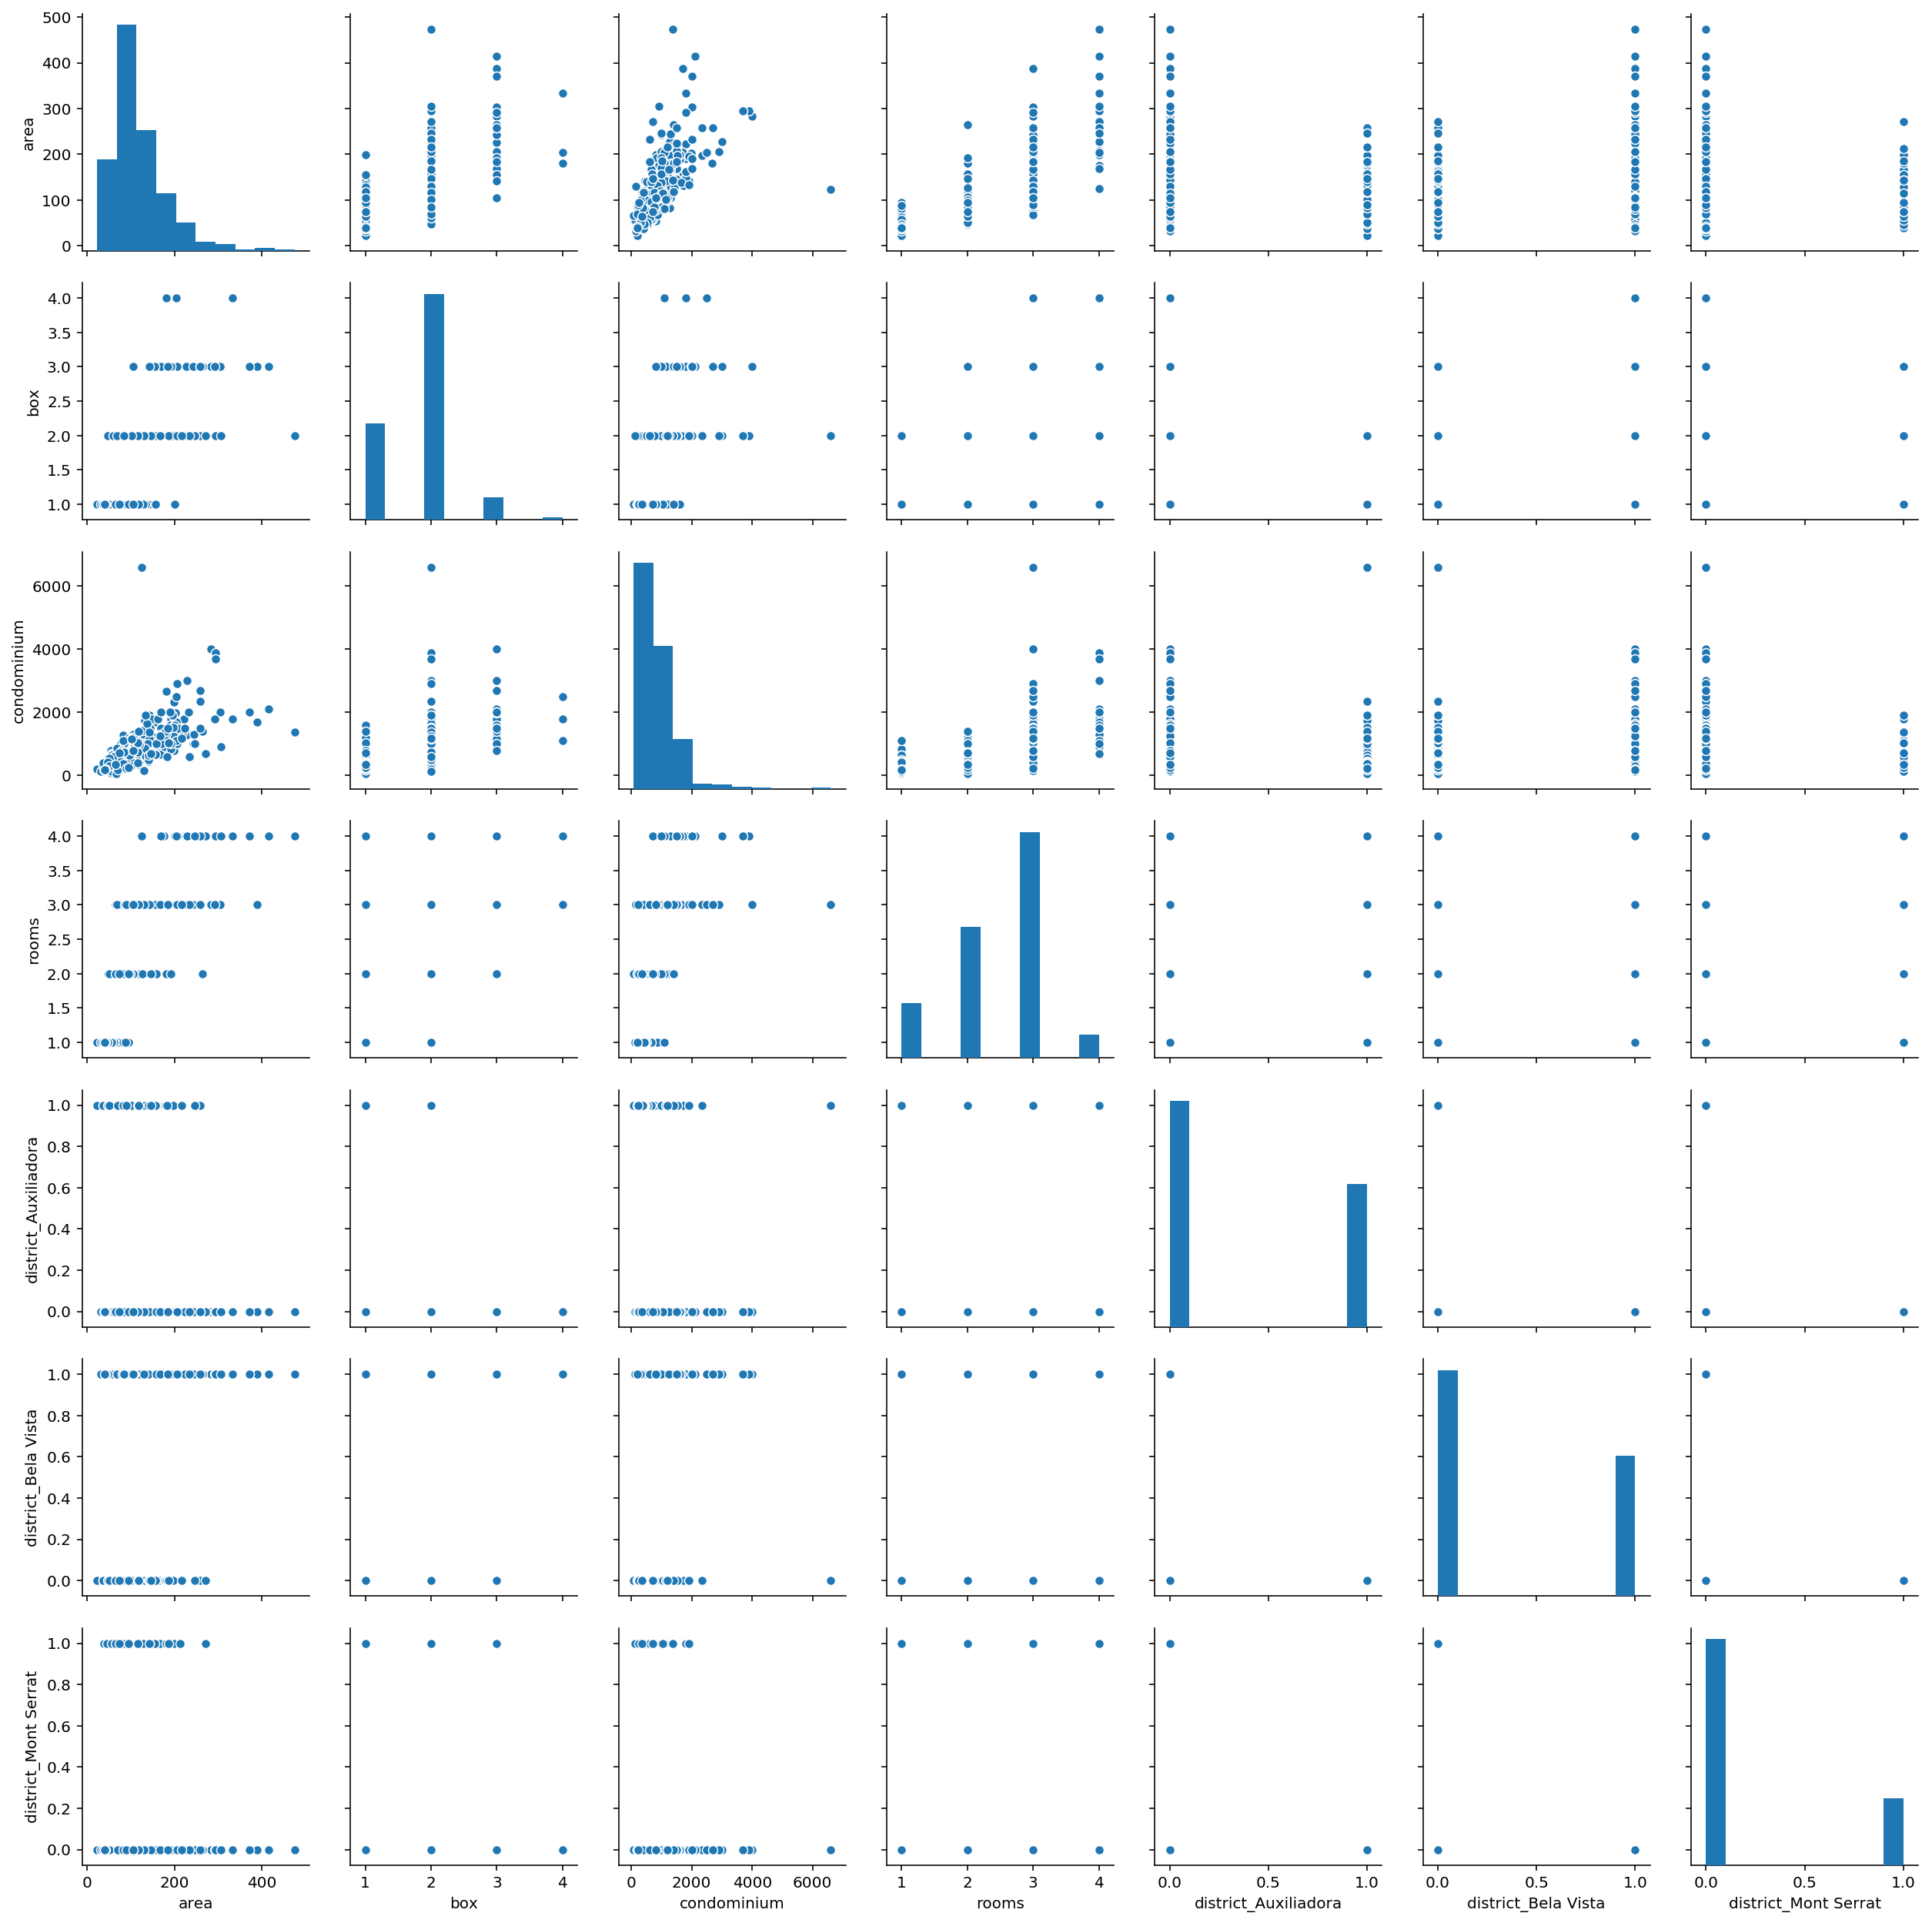

In [132]:
import seaborn as sns
sns.pairplot(df, vars=(features_list))

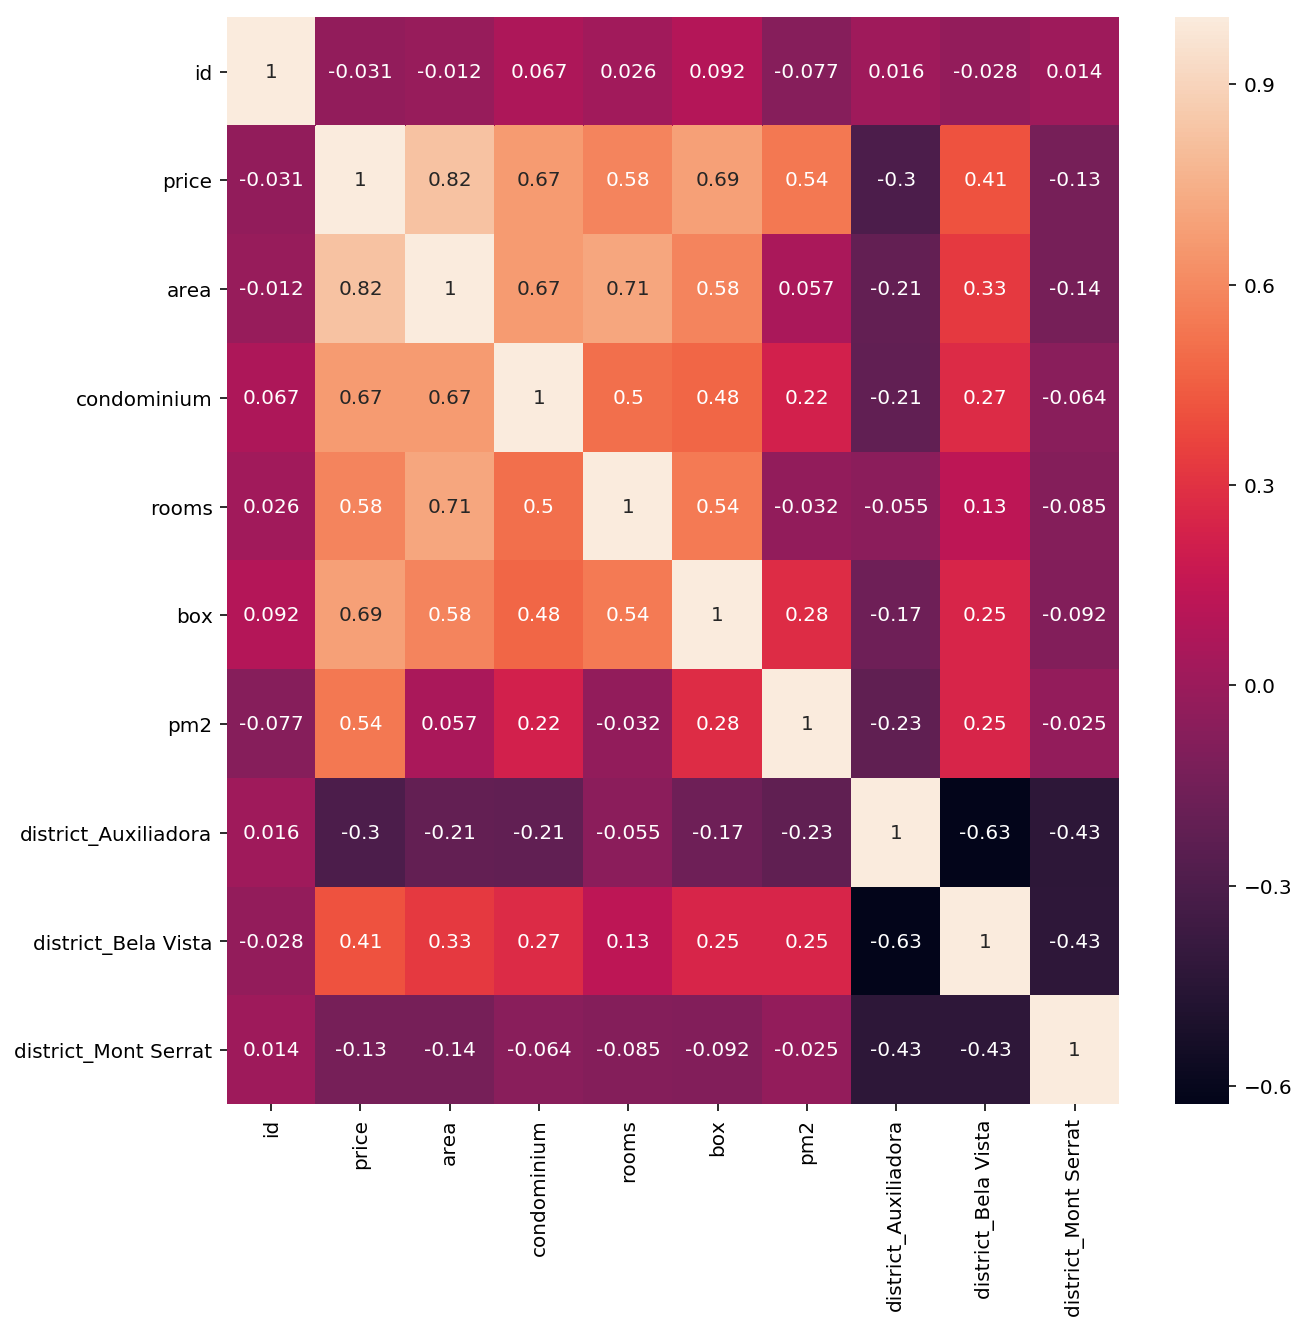

In [133]:
#df_s_id = df
#df_s_id.drop(['id'], axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

'''
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools

trace1 = go.Scatter(
    name='test',
    x = df.area,
    y = df.price,
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace2 = go.Scatter(
    x = np.log(df.area),
    y = np.log(df.price),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('size x price', 'size x price (log)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
#fig.append_trace(trace3, 2, 1)
#fig.append_trace(trace4, 2, 2)



fig['layout'].update(height=600, width=800, title='Stacked subplots')
iplot(fig)
'''

In [134]:
#df.loc[:, 'area':'box']

In [135]:
# para ser utilizado no próximo bloco para selecionar o X
#df.iloc[:, df.columns.get_indexer(features_list)]

In [136]:
# retirar os valores X e y do DataFrame
features = df.iloc[:, df.columns.get_indexer(features_list)]
X = features.values
y = df['price'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))


X.shape: (428, 7) y.shape: (428,)


In [137]:
print (df.columns.get_indexer(features_list))

[ 2  5  3  4  9 10 11]


In [138]:
df

id      price   area  condominium  rooms  box  \
968    115046 1349000.00 198.40       800.00   3.00 2.00   
1658   147669  453000.00  52.93       430.00   1.00 1.00   
2326   149040 1800000.00 221.82      1800.00   4.00 2.00   
5262   176701  550000.00 107.00       790.00   3.00 1.00   
5282   157831  630000.00 105.54       350.00   3.00 2.00   
5334   176465  990000.00 100.00       990.00   2.00 2.00   
5371   176367  298000.00  60.58       300.00   2.00 2.00   
5396   173718 1550000.00 164.00      1800.00   3.00 2.00   
5397   176175 1350000.00 197.86      2330.00   3.00 2.00   
5404   176286  415000.00  67.91       830.00   2.00 2.00   
5412   176263  480000.00  54.26       600.00   1.00 1.00   
5423   176242  340000.00  46.18       200.00   1.00 1.00   
5450   162268  690000.00 101.72      1000.00   2.00 2.00   
5452   173365  780000.00 105.54       400.00   3.00 2.00   
5463   175852  395000.00  67.00       180.00   1.00 1.00   
5464     5139  430000.00  84.70       500.00   2.00 2.00   
5503   175091 1860000.00 219.61      1300.00   3.00 2.00   
5504   175945  635000.00  82.73      1280.00   2.00 2.00   
5520   175542 2770000.00 192.93      1250.00   3.00 3.00   
5547   174136 1600000.00 179.50      1400.00   3.00 2.00   
5559   175719 2180000.00 304.11      2000.00   3.00 3.00   
5569   174878 3300000.00 333.11      1800.00   4.00 4.00   
5598   174560  790000.00 121.18       798.00   3.00 2.00   
5600   144474 1330000.00 141.00      1100.00   3.00 2.00   
5604   175227 1150000.00 154.00      1700.00   3.00 2.00   
5720   174610 2500000.00 283.53      4000.00   3.00 3.00   
5790   175346  790000.00  86.83       800.00   2.00 2.00   
5809   139152  136700.00  23.00       200.00   1.00 1.00   
5814   175050  430000.00  66.03       250.00   1.00 1.00   
5895   170572 2400000.00 190.46      2000.00   3.00 3.00   
5949   174274 1650000.00 294.42      3882.00   4.00 2.00   
5970   174986  640000.00 102.70       430.00   3.00 2.00   
5990   174860 1300000.00 136.00      1200.00   3.00 2.00   
5991   174259 2100000.00 194.00      1500.00   3.00 3.00   
5992   174290 2100000.00 194.00      1500.00   3.00 3.00   
5997   174138  620000.00  95.80       650.00   3.00 2.00   
6021   173737 1810000.00 170.00      1400.00   4.00 2.00   
6072   174388  799000.00  84.00       750.00   2.00 2.00   
6089   174355 1280000.00 126.37      1400.00   3.00 2.00   
6120   172239  850000.00  90.83       800.00   3.00 2.00   
6121   173465  850000.00  74.79       800.00   2.00 2.00   
6169   174906  460000.00  71.05       350.00   1.00 1.00   
6196   168662  249000.00  45.32       180.00   1.00 1.00   
6228   174225  750000.00 105.23       600.00   3.00 2.00   
6246   153131  630000.00 130.00       594.00   3.00 2.00   
6308   173983  460000.00  73.00       300.00   2.00 2.00   
6328   116747  699000.00  73.44       400.00   2.00 2.00   
6329   174090  540000.00 141.00       450.00   3.00 1.00   
6333   119652  880000.00 131.89      1001.00   3.00 2.00   
6381   173039  360000.00  84.67       594.00   3.00 2.00   
6401   104286 1700000.00 142.13      1900.00   3.00 2.00   
6444   171640  945000.00 136.87      1200.00   3.00 2.00   
6479   154151  218000.00  40.04       200.00   1.00 1.00   
6515   164613  900000.00 110.00      1300.00   3.00 2.00   
6518   173555  650000.00 124.00      6600.00   3.00 2.00   
6528   172787  585000.00  74.29       400.00   2.00 1.00   
6542   142867  500000.00  74.78       225.00   3.00 2.00   
6585   169377  825000.00 106.15       800.00   3.00 2.00   
6593   172799 1200000.00 175.92      1200.00   3.00 2.00   
6746   172828  410000.00  57.00       501.00   1.00 2.00   
6760   171694  739000.00  70.74       618.00   2.00 2.00   
6853   172611  849000.00 101.72       900.00   2.00 2.00   
6879   172573  990000.00 163.77       878.00   3.00 2.00   
6926   172150  760000.00 103.94      1080.00   3.00 2.00   
6957   172381  750000.00 109.00       395.00   3.00 2.00   
6967   172379 1200000.00 257.90      2350.00   3.00


Número ótimo de atributos : 6


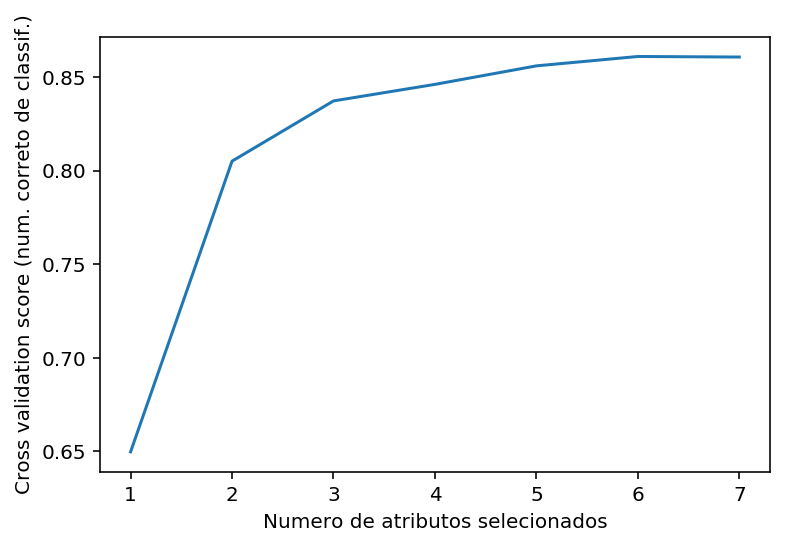

0 area 0.65
1 box 0.81
2 condominium 0.84
3 rooms 0.85
5 district_Bela Vista 0.86
6 district_Mont Serrat 0.86


In [140]:
# Identificar a quantidade ótima de atributos
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


#from sklearn.model_selection import StratifiedKFold
clf = RandomForestRegressor(n_estimators=50, random_state=42)
#rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2)) #,
#              scoring='accuracy')
rfecv = RFECV(estimator=clf, step=1)
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("\nNúmero ótimo de atributos : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de atributos selecionados")
plt.ylabel("Cross validation score (num. correto de classif.)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();


features_list_kb = []
for i in rfecv.get_support(indices=True):
    print (i, features_list[i], round(rfecv.grid_scores_[i],2))
    features_list_kb.append([features_list[i], round(rfecv.grid_scores_[i],2)])

In [141]:
features_list

['area',
 'box',
 'condominium',
 'rooms',
 'district_Auxiliadora',
 'district_Bela Vista',
 'district_Mont Serrat']

In [142]:
X_new.shape[1]

6

In [143]:
from sklearn.feature_selection import SelectKBest
from operator import itemgetter
selector = SelectKBest(k="all") # posso inserir o valor que desejar
selector.fit(X, y)
X_new = selector.transform(X)
print ("\nComposição dos atributos após KBest:", X_new.shape)
features_list_kb = []
for i in selector.get_support(indices=True):
    print (features_list[i], round(selector.scores_[i],2))
    features_list_kb.append([features_list[i], round(selector.scores_[i],2)])

#print selector.get_support(indices=True)
print ("\nAtributos em ordem de importância:")
features_list_kb = sorted(features_list_kb, key=itemgetter(1), reverse=True) 
for sublst in features_list_kb:
    for item in sublst:
        print (item)


Composição dos atributos após KBest: (428, 7)
area 8.26
box 3.74
condominium 1.92
rooms 2.64
district_Auxiliadora 1.12
district_Bela Vista 1.25
district_Mont Serrat 1.12

Atributos em ordem de importância:
area
8.26
box
3.74
rooms
2.64
condominium
1.92
district_Bela Vista
1.25
district_Auxiliadora
1.12
district_Mont Serrat
1.12


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.33, random_state=42)


In [145]:
X_new.shape

(428, 7)

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


parameters = {'n_estimators':[10, 50, 100], 
              'criterion':['mse', 'mae'],
              'max_features':["auto", "sqrt", "log2"],
             'random_state':[42]}

rfr = RandomForestRegressor()

grid = GridSearchCV(rfr, parameters, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Train set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

Best cross-validation accuracy: 0.84
Train set score: 0.96
Test set score: 0.86
Best parameters: {'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}
MSE: 56647478382.8958
MAE: 176288.4070
EVS: 0.8610


In [147]:
# sequência de input para previsão de preço de um imóvel
print (features_list_kb)
print (X_new.shape[1])


[['area', 8.26], ['box', 3.74], ['rooms', 2.64], ['condominium', 1.92], ['district_Bela Vista', 1.25], ['district_Auxiliadora', 1.12], ['district_Mont Serrat', 1.12]]
7


In [148]:
# prevendo o preço de um imóvel
imovel = [[119, 2, 3, 750, 0, 0, 1]]
prev = int(grid.predict(imovel))
var = 795000 - prev
print (prev)
print (var)
if var < 0:
    print ("Oportunidade com desconto de: {:.2f}%". format(var*100/prev))

#5685, 48361, 14155    

780845
14155


In [149]:
# Este processo se mostrou melhor para escolher os Xs

# Get numerical feature importances
importances = list(grid.best_estimator_.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: area                 Importance: 0.4
Variable: condominium          Importance: 0.29
Variable: box                  Importance: 0.15
Variable: rooms                Importance: 0.1
Variable: district_Bela Vista  Importance: 0.03
Variable: district_Auxiliadora Importance: 0.02
Variable: district_Mont Serrat Importance: 0.01


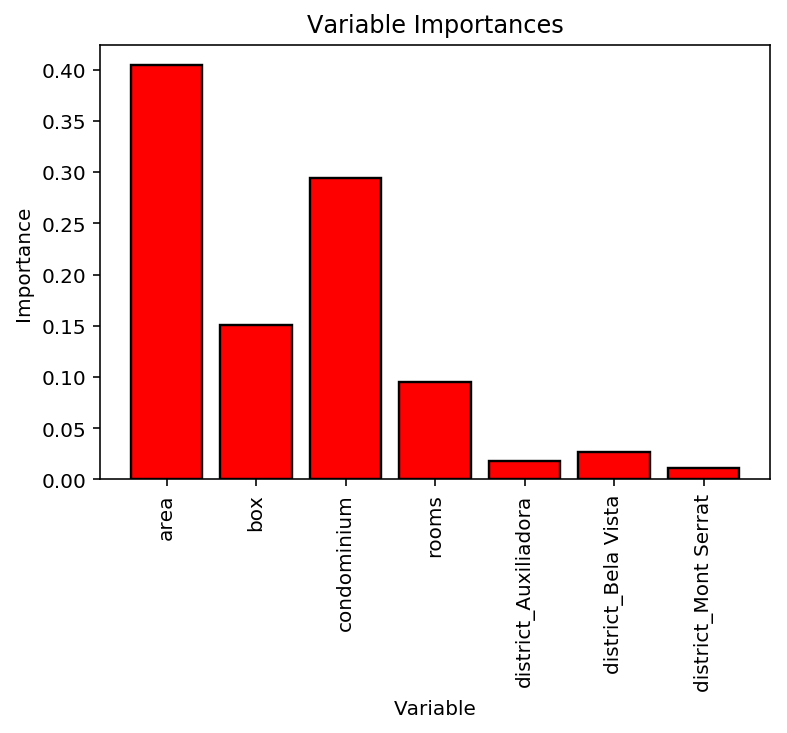

In [150]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

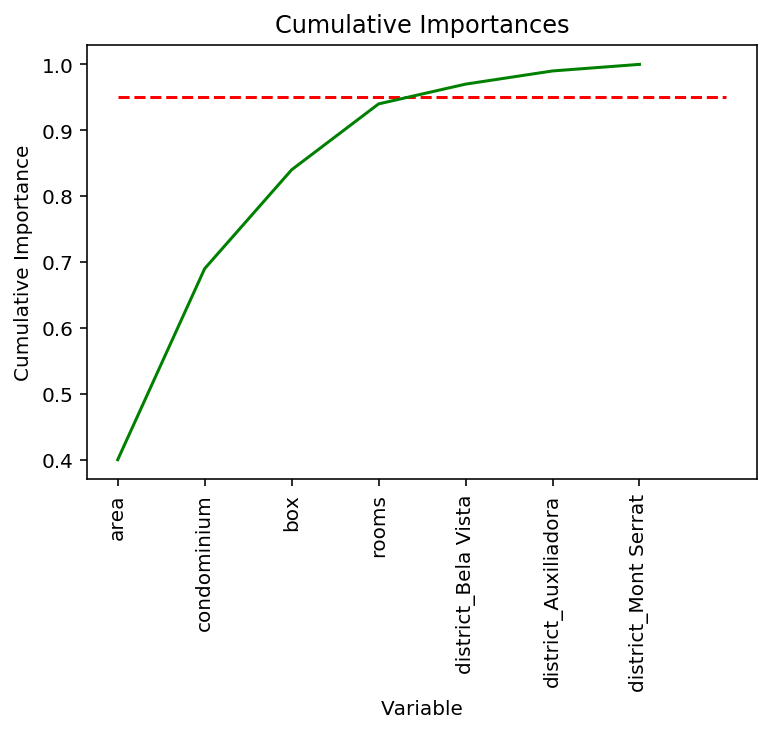

In [151]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [152]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5


In [153]:
'''
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)
'''

"\n# Extract the names of the most important features\nimportant_feature_names = [feature[0] for feature in feature_importances[0:5]]\n# Find the columns of the most important features\nimportant_indices = [feature_list.index(feature) for feature in important_feature_names]\n# Create training and testing sets with only the important features\nimportant_train_features = train_features[:, important_indices]\nimportant_test_features = test_features[:, important_indices]\n# Sanity check on operations\nprint('Important train features shape:', important_train_features.shape)\nprint('Important test features shape:', important_test_features.shape)\n"

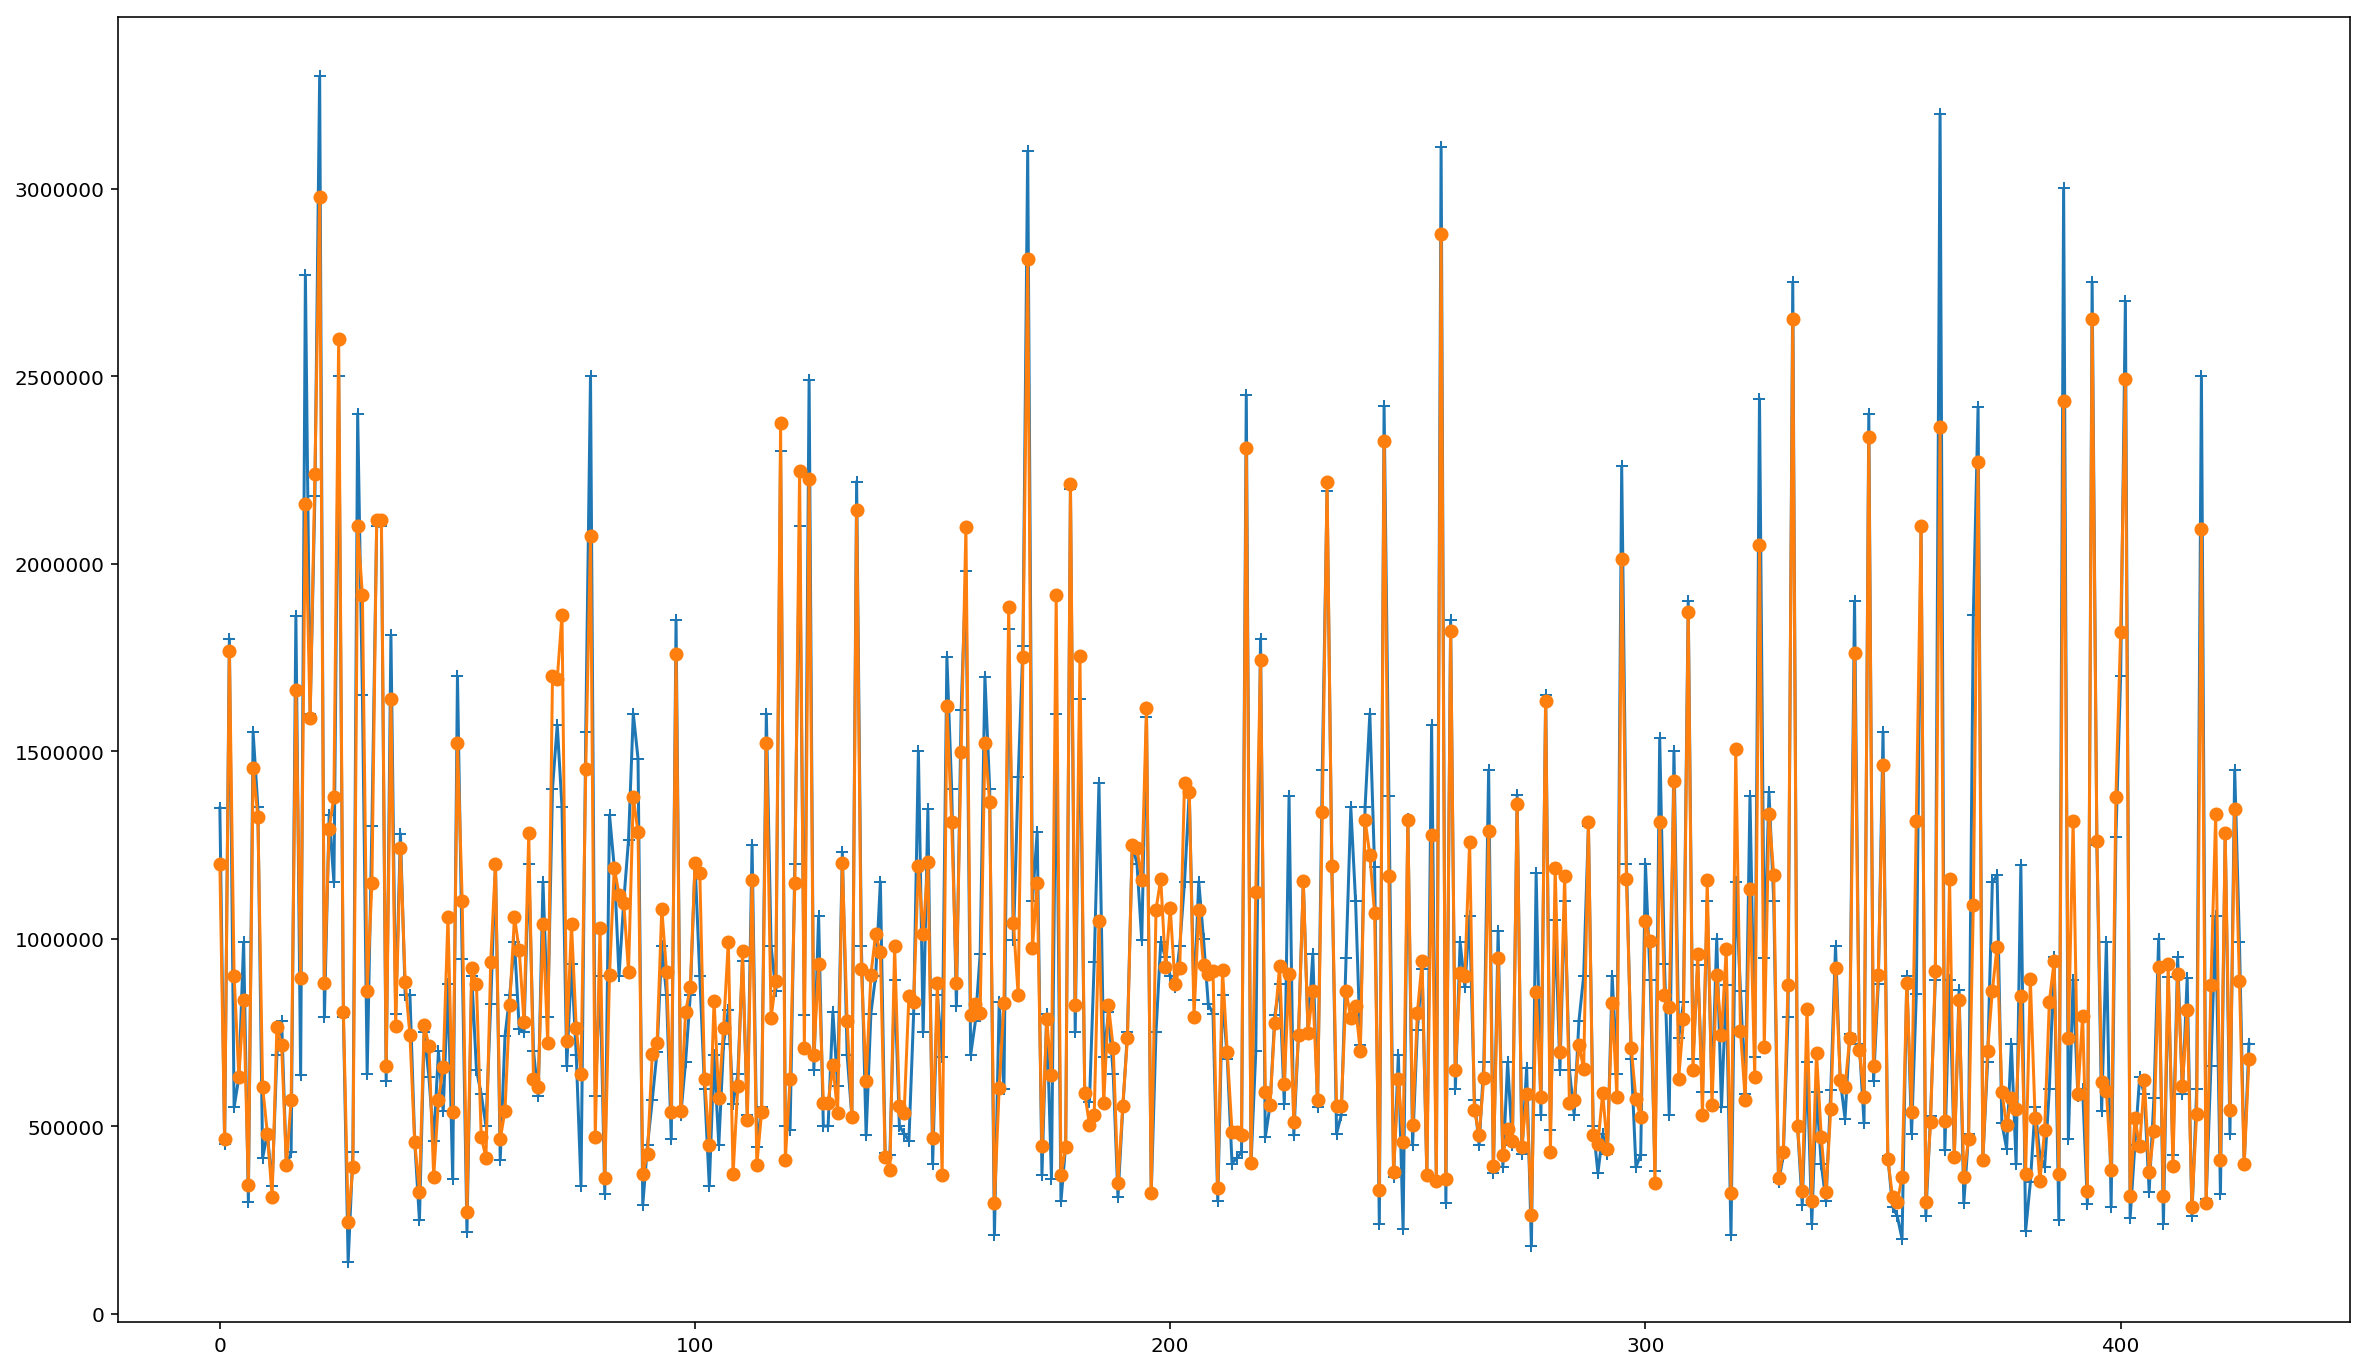

In [154]:
# identificar oportunidades
# gráfico preço ofertado x preço previsto
plt.figure(figsize=(20,12))
prev = (grid.predict(X_new))
plt.plot(range(0, y.shape[0]), y, marker='+')
plt.plot(range(0, prev.shape[0]), prev, marker='o')

## Para prever o preço de um determinado imóvel

In [155]:
# calcular valores: oportunidades ou super avaliados
df['pred'] = grid.predict(df[['area', 'condominium']]) # salvar valores preditivos
df['var'] = df['price'] - df['pred'] # salvar diferença preço e preditivo
df['var_p'] = df['var'] * 100 / df['pred'] # salvar a variação percentual

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 2 

In [ ]:
# identificar concorrentes

final_select = df.query("(var < 0 & box == 2. & area > 100. & price < 800000)").sort_values(by='var_p')
final_select


In [ ]:
#salvando csv
final_select.to_csv(('MontSerrat.csv'), sep='\t')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    RandomForestRegressor())


param_grid = {
     'randomforestregressor__n_estimators': [50, 100],
     'randomforestregressor__max_features': [1],
     'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    GradientBoostingRegressor())


param_grid = {
    'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'gradientboostingregressor__n_estimators': [50, 100],
    'gradientboostingregressor__max_features': [rfecv.n_features_],
    'gradientboostingregressor__max_depth': [1, 2, 3],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    AdaBoostRegressor())


param_grid = {
    'adaboostregressor__loss': ['linear', 'square', 'exponential'],
    'adaboostregressor__n_estimators': [50, 100],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
# prevendo o preço de um imóvel
imovel = [[119, 750, 3]]
prev = int(grid.predict(imovel))
var = 795000 - prev
print (prev)
print (var)
if var < 0:
    print ("Oportunidade com desconto de: {:.2f}%". format(var*100/prev))


